In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Supply chain_AT.csv')

In [ ]:
df.head()

,Warehouse_ID,Location,Current_Stock,Demand_Forecast,Lead_Time_Days,Shipping_Time_Days,Stockout_Risk,Operational_Cost,Supplier_ID,Product_Category,Monthly_Sales,Order_Processing_Time,Return_Rate,Customer_Rating,Warehouse_Capacity,Storage_Cost,Transportation_Cost,Backorder_Quantity,Damaged_Goods,Employee_Count
0,WH239,Dallas,3926,484,8,3,7,93895,S693,Groceries,4893,4.766231,6.053952,3.840976,28701,16975,2778,228,26,83
1,WH244,Houston,3032,5122,3,6,25,46847,S880,Electronics,4453,4.304335,3.886996,2.113929,36198,14052,1535,288,16,39
2,WH340,Chicago,4763,4343,5,5,16,64176,S116,Furniture,5956,1.030779,7.335160,4.211437,22784,9863,13435,153,3,49
3,WH428,Atlanta,2219,777,7,6,15,38940,S431,Apparel,5814,2.871244,1.393481,1.751671,13172,15911,14508,143,39,35
4,WH202,Dallas,809,4756,2,7,16,33933,S821,Electronics,2279,4.060930,4.212666,4.231919,39619,19011,1904,296,30,67


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Warehouse_ID           500 non-null    object 
 1   Location               500 non-null    object 
 2   Current_Stock          500 non-null    int64  
 3   Demand_Forecast        500 non-null    int64  
 4   Lead_Time_Days         500 non-null    int64  
 5   Shipping_Time_Days     500 non-null    int64  
 6   Stockout_Risk          500 non-null    int64  
 7   Operational_Cost       500 non-null    int64  
 8   Supplier_ID            500 non-null    object 
 9   Product_Category       500 non-null    object 
 10  Monthly_Sales          500 non-null    int64  
 11  Order_Processing_Time  500 non-null    float64
 12  Return_Rate            500 non-null    float64
 13  Customer_Rating        500 non-null    float64
 14  Warehouse_Capacity     500 non-null    int64  
 15  Storag

In [ ]:
df.describe()

,Current_Stock,Demand_Forecast,Lead_Time_Days,Shipping_Time_Days,Stockout_Risk,Operational_Cost,Monthly_Sales,Order_Processing_Time,Return_Rate,Customer_Rating,Warehouse_Capacity,Storage_Cost,Transportation_Cost,Backorder_Quantity,Damaged_Goods,Employee_Count
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,2722.822000,2957.050000,5.958000,3.948000,14.944000,65886.354000,5335.572000,2.750462,5.229366,3.090865,30032.818000,10263.83400,8001.086000,147.380000,24.684000,52.810000
std,1314.878786,1398.763988,2.630223,1.921635,5.923431,20283.576821,2619.353688,1.262967,2.661448,1.156971,11921.277948,5584.14567,4269.354045,87.880656,14.868298,27.888087
min,519.000000,402.000000,2.000000,1.000000,5.000000,30165.000000,1004.000000,0.505159,0.506755,1.004825,10338.000000,1083.00000,515.000000,0.000000,0.000000,5.000000
25%,1565.250000,1745.750000,4.000000,2.000000,10.000000,48731.750000,2978.000000,1.644623,3.085484,2.073853,19486.750000,5335.75000,4294.500000,71.750000,11.000000,28.000000
50%,2670.000000,3094.000000,6.000000,4.000000,15.000000,65733.500000,5234.000000,2.817771,5.128133,3.148014,29862.500000,10023.00000,7973.000000,141.000000,25.000000,53.000000
75%,3842.750000,4152.500000,8.000000,6.000000,20.000000,82900.250000,7550.750000,3.782273,7.406404,4.137274,40692.250000,15162.00000,11857.000000,224.000000,37.000000,78.000000
max,4998.000000,5200.000000,10.000000,7.000000,25.000000,99965.000000,9931.000000,4.954139,9.992465,4.998258,49979.000000,19979.00000,14988.000000,300.000000,50.000000,100.000000


In [ ]:
df.isnull().sum()

,0
Warehouse_ID,0
Location,0
Current_Stock,0
Demand_Forecast,0
Lead_Time_Days,0
Shipping_Time_Days,0
Stockout_Risk,0
Operational_Cost,0
Supplier_ID,0
Product_Category,0


In [ ]:
Max=df['Operational_Cost'].quantile(0.75)
Min=df['Operational_Cost'].quantile(0.25)
IQR=Max-Min
print(f"Max: {Max}\nMin: {Min}\nIQR: {IQR}")

Max: 82900.25
Min: 48731.75
IQR: 34168.5


**IQR has lower operational cost means consistent operational cost, indicating stable supplier pricing and efficient logistics.**

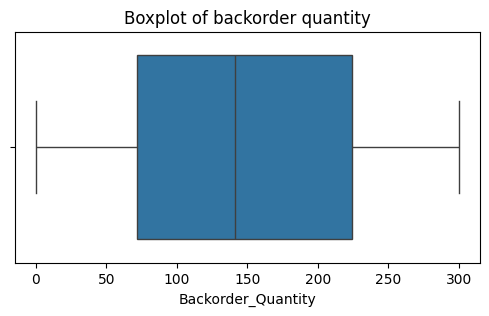

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Backorder_Quantity'])
plt.title('Boxplot of backorder quantity')
plt.show()

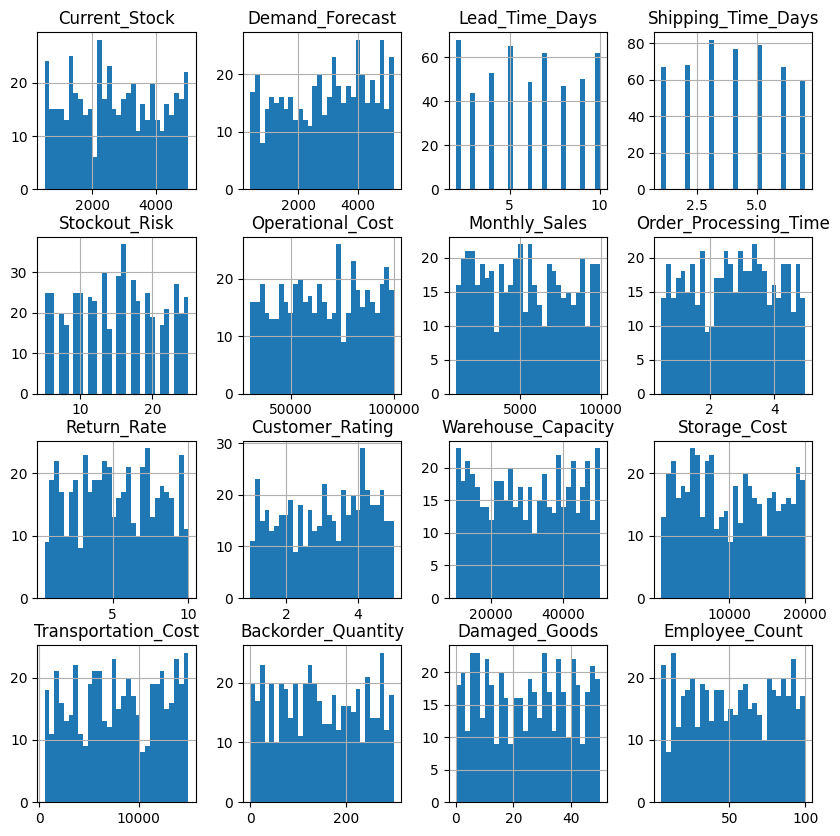

In [ ]:
df.hist(figsize=(10,10),bins=30)
plt.show()

**1.Current Stock**

Appears skewed, with some values having significantly higher stock levels.

**Recommendation:** Investigate inventory management to avoid overstocking and reduce holding costs.

**2.Demand Forecast**

Shows a wide range of demand values.

**Recommendation:** Improve forecasting models using historical trends and machine learning to reduce errors.



**3.Lead Time (Days)**

Appears right-skewed, with some instances having much higher lead times.

**Recommendation:** Work on supplier performance improvement and alternative sourcing to reduce delays.



**4.Shipping Time (Days)**

High variation, with some extreme shipping delays.

**Recommendation:** Optimize logistics and explore better carrier partnerships for consistent delivery times.

**5.Stockout Risk**

Shows high variability, indicating certain products frequently run out of stock.

**Recommendation:** Implement safety stock strategies and better demand forecasting.



**6.Operational Cost**

Appears skewed, meaning some operations incur significantly higher costs.

**Recommendation:** Identify cost drivers and optimize logistics, warehousing, and procurement.



**7.Monthly Sales**

Distributed across different sales volumes, indicating demand fluctuations.

**Recommendation:** Use sales trend analysis to adjust inventory and marketing strategies.



**8.Order Processing Time**

Variability present, suggesting inconsistencies in processing efficiency.

**Recommendation:** Streamline order management systems and automate where possible.



**9.Return Rate**

Shows diversity in return patterns, indicating issues in product quality or customer satisfaction.

**Recommendation:** Improve quality control and analyze return reasons.



**10.Customer Rating**

Right-skewed, meaning some products get significantly lower ratings.

**Recommendation:** Enhance product quality and customer service.


**11.Warehouse Capacity**

Spread across different levels, with some warehouses near full capacity.

**Recommendation:** Optimize storage utilization and consider expansion where necessary.


**12.Storage Cost**

High variance, indicating cost inefficiencies.

**Recommendation:** Reduce inventory holding time and optimize warehouse distribution.

**13.Transportation Cost**

The data appears widely spread, indicating high variability in transportation expenses.

**Recommendation:** Optimize route planning and negotiate bulk discounts with carriers to control costs.


**14.Backorder Quantity**

There are several peaks, suggesting fluctuations in backorders across different products.

**Recommendation:** Implement better inventory forecasting models and improve supplier reliability.

**15.Damaged Goods**

The histogram suggests a varied distribution, indicating frequent product damage issues.

**Recommendation:** Implement stricter quality checks, improve packaging, and monitor transportation conditions.


**16.Employee Count**

The distribution shows a wide range, meaning different warehouses or departments have varying employee numbers.

**Recommendation:** Optimize workforce planning by analyzing productivity vs. workforce size.

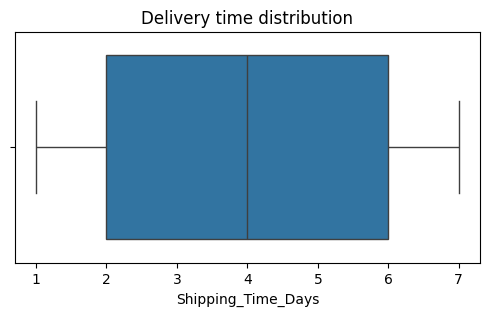

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Shipping_Time_Days'])
plt.title('Delivery time distribution')
plt.show()

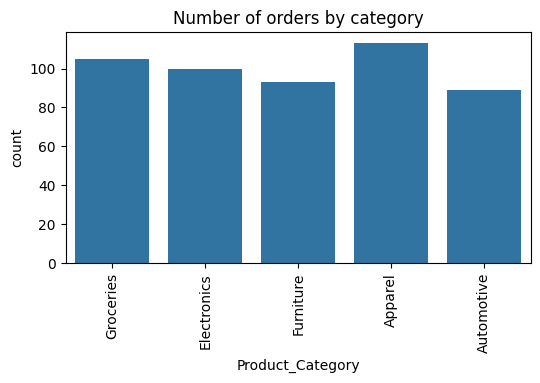

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x=df['Product_Category'])
plt.title('Number of orders by category')
plt.xticks(rotation=90)
plt.show()

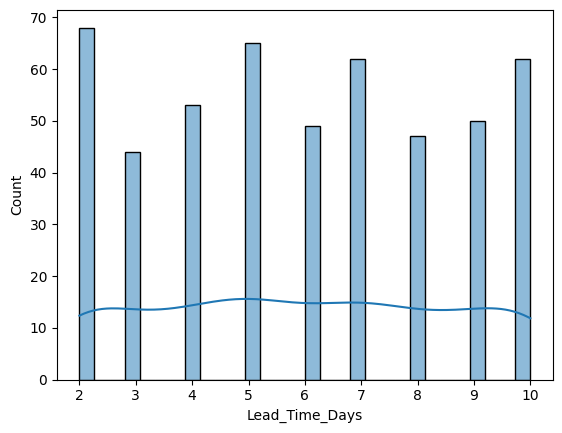

In [ ]:
sns.histplot(df["Lead_Time_Days"],
bins=30,kde=True)
plt.show()

In [ ]:
correlation=df['Lead_Time_Days'].corr(df['Stockout_Risk'])
print(f"Correlation between Lead Time and Stockout Rist:{correlation:.2f}")

Correlation between Lead Time and Stockout Rist:-0.02


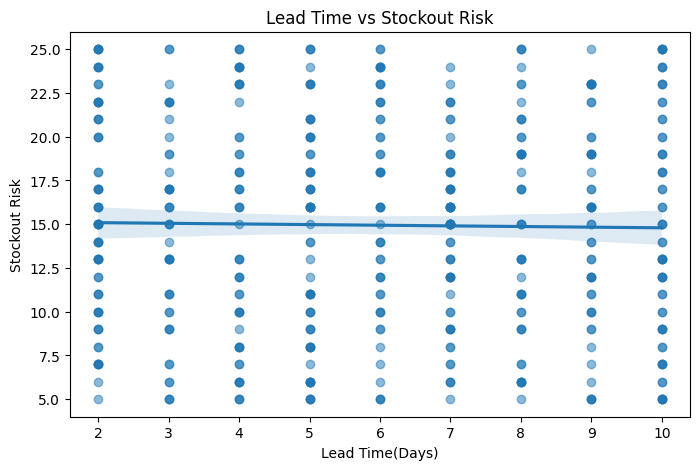

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['Lead_Time_Days'],y=df['Stockout_Risk'],
scatter_kws={"alpha":0.5})
plt.xlabel("Lead Time(Days)")
plt.ylabel("Stockout Risk")
plt.title('Lead Time vs Stockout Risk')
plt.show()

**There is no correlation Stockout risk isn't heavily affected by lead time.**